In [5]:
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
from munch import Munch
from scipy.linalg import eigvalsh

from QO.general import vec2
from QO.hamiltonians import k_space_H, eigs_over_k

import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 4.0)

from QO.thermodynamics import GCP_contributions, GCP

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



Doing a sweep over L_x producing a sweep over B
L_x = [99 96 92 89 86 83 80 77 75 73 71 69 67 65 63 62 60 59 57 56 55 54 52 51
 50 49 48 47 46 46 45 44 43 42 42 41 40 40 39 38 38 37 37 36 35 35 34 34
 34 33 33 32 32 31 31 31 30 30 29 29 29 28 28 28 27 27 27 26 26 26 26 25
 25 25 25 24 24 24 24 23 23 23 23 22 22 22 22 22 21 21 21 21 21 21 20 20
 20 20 20 20]




/Users/tom/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


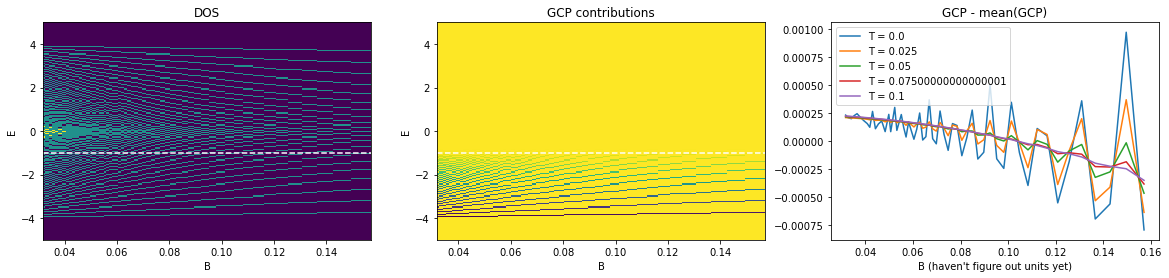

In [19]:
phi = np.linspace(np.pi / 50, np.pi / 10, 100)
L_x = np.array(2*np.pi / phi, dtype = int)

print(f"""
Doing a sweep over L_x producing a sweep over B
L_x = {L_x}

""")
#L_x = np.arange(1,50,1)

params = Munch(
#hopping parameters in each direction
t = vec2(1,1),

#size of the magnetic unit cell in each direction, L_y = 2 and large L_x means small magenetic field
#L = vec2(10,1),

#the k_x and y in real space at which to evaluate the hamiltionian
k = vec2(0,0),

#the number of unit cells to tile in each direction
N = vec2(1, 1),
)  

bins = np.linspace(-5,5,200)
mu = -1
T = 0
Ts = np.linspace(0,.1,5)
B = np.pi / L_x

DOS = np.zeros((L_x.size, bins.size - 1))
contribs = np.zeros((L_x.size, bins.size - 1))
GCPs = np.zeros([len(Ts), len(L_x)])
for i, lx in enumerate(L_x):
    eigs = eigs_over_k(k_space_H, L = vec2(lx, 1), **params)
    DOS[i], _ = np.histogram(eigs, bins)
    contribs[i] = DOS[i] * GCP_contributions(bins, mu = mu, T = T)[:-1]
    
    for j,T in enumerate(Ts):
        GCPs[j, i] = GCP(eigs, mu, T)

#


dGCP = np.diff(GCPs, axis = -1)
dB = np.diff(B)
M = - dGCP / dB

f, axes = plt.subplots(ncols = 3, figsize = (20,4))
axes[0].pcolormesh(B, bins, DOS.T)
axes[0].hlines(y = mu, xmin = min(B), xmax = max(B), label = 'mu', linestyle = '--', color = 'white')
axes[0].set(ylabel = 'E', xlabel = 'B', title = 'DOS')

axes[1].pcolormesh(B, bins, contribs.T)
axes[1].hlines(y = mu, xmin = min(B), xmax = max(B), label = 'mu', linestyle = '--', color = 'white')
axes[1].set(ylabel = 'E', xlabel = 'B', title = 'GCP contributions')


for j, T in enumerate(Ts):
    axes[2].plot(B[:], GCPs[j] - np.mean(GCPs[j]), label = f"T = {T}")
axes[2].set(xlabel = "B (haven't figure out units yet)", title = "GCP - mean(GCP)")
#     axes[3].plot(B[:-1], M[j])
    
axes[2].legend()